In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
text = ['Mars has an atmosphere', "Saturn's moon Titan has its own atmosphere", "Mars has two moons",
        'Saturn has many moons', 'Venus used to have an atmosphere']

In [3]:
# prepare some dumb vector representation of words
# here, each word represented by its context encoding (1 or 0 depending on whether
# the target word appeared with another word or not)

dictionary = {}
for each_sent in text:
    words = each_sent.split()
    for w in words:
        if w not in dictionary:
            dictionary[w] = {}
        for another_word in words:
            dictionary[w][another_word] = 1

In [5]:
# dataframe of generated features
mars_df = pd.DataFrame(dictionary)
mars_df.fillna(0, inplace=True)
mars_df

,Mars,has,an,atmosphere,Saturn's,moon,Titan,its,own,two,moons,Saturn,many,Venus,used,to,have
Mars,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
has,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
an,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
atmosphere,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
two,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
moons,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
Saturn's,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
moon,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Titan,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
its,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
pca = PCA()
result = pca.fit_transform(mars_df)

In [7]:
# 1 x 18
#for each_representation in result:
#    print(each_representation, each_representation.shape)

In [8]:
# visualising using only 2D space

0.20303707934198978 1.0907455739792575
-1.4162528983095246 0.31898468177787287
1.594564624340961 -0.2992524393572126
0.11748781053403087 -1.611890738500771
-0.09721191301107236 1.5431988847827363
-0.23942507685565684 2.0840762917249105
-1.433374140299648 -0.8697170960771713
-1.433374140299648 -0.8697170960771713
-1.433374140299648 -0.8697170960771713
-1.433374140299648 -0.8697170960771713
-1.433374140299648 -0.8697170960771713
-0.19100177131948634 1.7042160123684402
-0.19100177131948634 1.7042160123684402
1.8466686545241215 -0.5464271996894544
1.8466686545241215 -0.5464271996894544
1.8466686545241215 -0.5464271996894544
1.8466686545241215 -0.5464271996894544


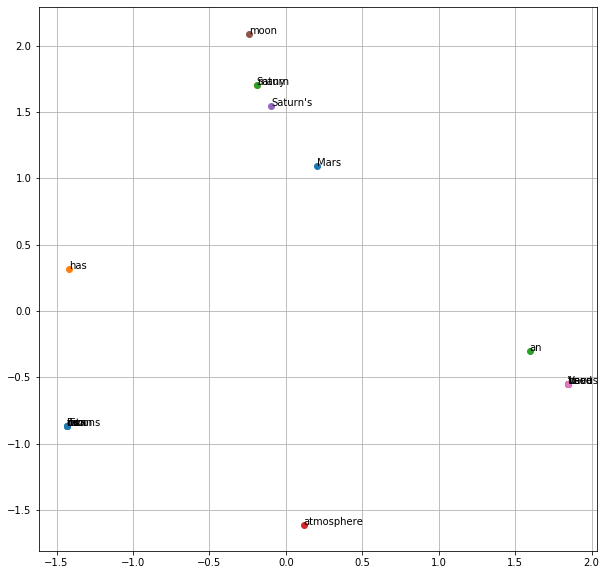

In [9]:
plt.figure(figsize=(10, 10))

plt.grid()

for num, label in enumerate(mars_df.columns):
    #print(num, label)
    x, y = result[num, 0], result[num, 1]
    print(x, y)
    
    plt.scatter(x, y)
    
    plt.annotate(label, xy=(x, y), ha='left')
